In [144]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import plot_importance
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 800)

# load data
df = pd.read_csv('rbData.csv')
df.head(700)

,Player,Team,Draft Year,Yr1 Pos Rk,Yr1 Pos PPG Rk,Yr1 Pos Tm Rk,Yr1 G,Yr1 Opps,Yr1 YTMA/G,Yr1 PPR PPG,Yr1 Rec Dom,Yr1 PPR Pts,Yr1 Snap%,Yr1 Tgts,Yr1 Tgt%,Yr1 Rush Att,Yr1 Tm Rush Att%,Yr1 Tm Opp%,Yr1 EP,Yr1 Rush EP,Yr1 Rec EP,Yr1 Yds,Yr1 Tds,Yr1 Recs,Yr1 Rec Yds,Yr1 YAC,Draft Pick,Draft Year Age,BOA 15%,Total College Touches,Total College Yds,College Yd/G,Total College Dom,College YTMA Dom,Best College YTMA Conf Adj,Best College Adj YTMA,Avg College Adj YTMA,Best College Adj YTMA Over Conf,Avg College Adj YTMA Over Conf,Best College YTMPA,Avg College YTMPA,Best College YTMA,Ave College YTMA,Best College YTMA +/- Conf Avg,Avg College YTMA +/- Conf Avg,College Rush Dom,BMI,Fourty-Time,WaSS,Number of Top 5 Pos Finishes,Number of Top 12 Pos Finishes,Number of Top 24 Pos Finishes,Yr 2 PPG
0,Jonathan Taylor,IND,2020,6,10,1,15,273,1.55,16.99,0.092262,254.80,0.48,41,0.08,232,0.53,0.29,212.1,146.4,65.4,1169,11,36,299,367.0,41,21.0,18.0,960.0,6521.0,159.048780,0.392789,2.528612,1.445309,2.722041,2.548670,1.622400,1.449029,2.608799,2.423633,2.608799,2.423633,1.445309,1.260143e+00,0.602385,32.427329,4.39,121.697135,0,1,1,NaN
1,James Robinson,JAC,2020,7,7,1,14,300,1.70,18.03,0.146979,252.40,0.70,60,0.12,240,0.79,0.37,218.8,130.0,88.7,1070,7,49,344,387.0,329,22.0,NaN,855.0,4890.0,106.300000,0.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.300000,4.64,94.500000,0,1,1,NaN
2,Antonio Gibson,WAS,2020,14,19,1,14,214,1.19,14.73,0.065068,206.20,0.42,44,0.09,170,0.48,0.25,167.6,106.5,61.0,795,11,36,247,292.0,66,22.0,21.0,77.0,1203.0,63.315789,0.172625,1.176972,-0.036704,1.960554,1.960554,0.919593,0.919593,1.176972,0.638996,1.176972,0.729915,-0.036704,-4.837613e-01,0.136055,30.080701,4.39,122.774101,0,0,1,NaN
3,D'Andre Swift,DET,2020,17,18,1,13,171,1.14,14.91,0.126735,193.80,0.46,57,0.13,114,0.38,0.23,164.7,79.2,85.8,521,8,46,357,321.0,35,21.0,19.0,513.0,3551.0,82.581395,0.225893,1.574094,0.606349,1.852311,1.548481,0.822493,0.801935,1.574094,1.303637,1.574094,1.303637,0.606349,3.358915e-01,0.403914,32.234197,4.48,105.257682,0,0,1,NaN
4,Clyde Edwards-Helaire,KC,2020,22,25,1,13,236,1.29,13.54,0.071749,176.00,0.59,55,0.11,181,0.53,0.28,188.2,109.8,78.3,803,4,36,297,296.0,32,21.0,20.0,436.0,2652.0,69.789474,0.287291,1.759661,0.945420,2.186616,1.052046,1.112729,1.112729,1.759661,0.871319,1.759661,0.879031,0.945420,6.479055e-02,0.528785,32.420489,4.60,92.463220,0,0,1,NaN
5,J.K. Dobbins,BAL,2020,24,33,1,15,158,1.03,11.23,0.041110,168.50,0.47,24,0.06,134,0.25,0.18,119.2,83.9,35.4,805,9,18,120,129.0,55,21.0,18.0,796.0,5104.0,121.523809,0.303512,2.184466,1.157402,2.424272,1.848226,1.442645,0.866599,2.184466,1.642550,2.184466,1.642550,1.157402,6.154863e-01,0.552668,30.863625,NaN,NaN,0,0,1,NaN
6,Cam Akers,LAR,2020,45,54,2,13,159,0.87,7.98,0.054475,103.80,0.29,14,0.03,145,0.37,0.19,113.4,91.0,22.7,625,2,11,123,56.0,52,21.0,18.0,655.0,3361.0,93.361111,0.357929,1.538202,0.873942,2.116650,1.638633,1.196781,0.718764,1.538202,1.337998,1.884270,1.473010,0.873942,4.626826e-01,0.610403,31.135976,4.47,108.707532,0,0,0,NaN
7,Zack Moss,BUF,2020,49,55,3,13,130,0.70,7.82,0.032395,101.60,0.46,18,0.04,112,0.33,0.16,101.7,72.5,29.2,481,4,14,95,75.0,86,22.0,19.0,769.0,4698.0,104.400000,0.299324,2.054670,0.846167,2.688628,1.730529,1.588590,1.033271,2.054670,1.311093,2.212721,1.541644,0.846167,1.750897e-01,0.524474,32.931044,4.65,95.394437,0,0,0,NaN
8,Joshua Kelley,LAC,2020,58,67,4,13,135,0.56,6.55,0.032069,85.20,0.30,24,0.05,111,0.29,0.15,103.3,68.7,34.3,354,2,23,148,173.0,112,22.0,20.0,481.0,2496.0,113.454545,0.324448,1.447970,0.516313,2.135927,1.706133,1.035889,0.606096,1.725962,1.447970,1.882867,1.579603,0.516313,2.130491e-01,0.648651,29.567730,4.49,104.323102,0,0,0,NaN
9,Salvon Ahmed,MIA,2020,64,32,2,6,89,1.06,11.50,0.015474,69.00,0.54,14,0.07,75,0.47,0.24,72.0,50.3,21.6,319,3,11,61,41.0,329,23.0,22.0,403.0,2347.0,60.179487,0.254171,1.301887,0.478773,1.517689,1.066521,0.379714,0.379714,1.301887,0.902574,1.410377,0.938737,0.478773,7.133080e-03,0.495069,27.475674,

In [145]:
# split data
X, y = df.iloc[25:669, 3:49], df.iloc[25:669, -1:]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=40)

In [146]:
# build and fit model
from xgboost import XGBRegressor
model = XGBRegressor(n_estemators=1000, learning_rate=0.5) # note: n_estimators specifies how many times to go through the modeling cycle. if it is too large -> overfit. if it is too small -> underfit
# note: lower learning rate prevents overfitting
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False) # note: early_stopping_round automatically finds the ideal n_estimators value. if 5 is specified, then if the model does not imprve after 5 iterations it stops

[00:15:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_estemators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estemators=1000, n_estimators=100, n_jobs=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

<BarContainer object of 46 artists>

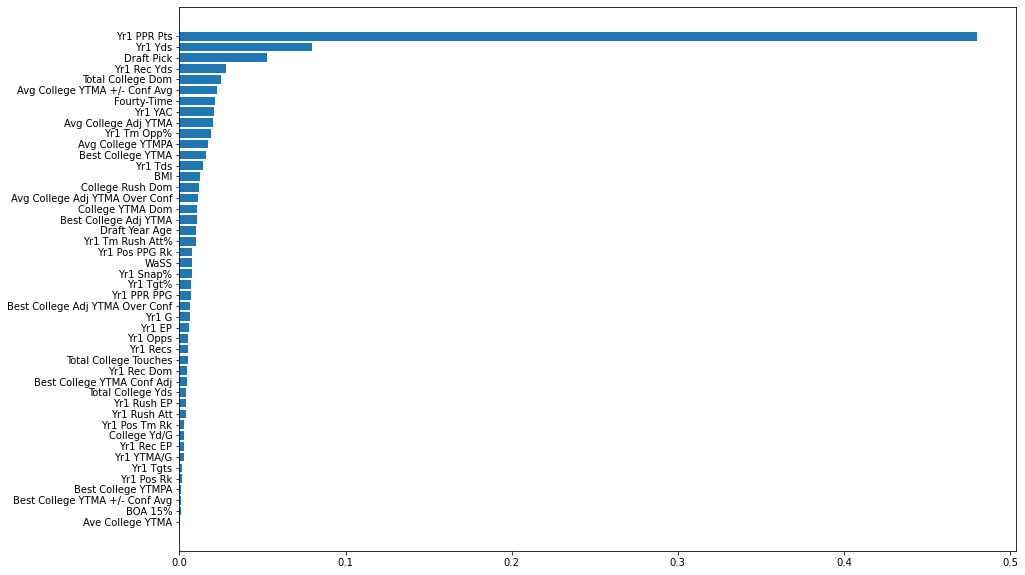

In [147]:
# plot feature importance
plt.figure(figsize=(15,10))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])

In [148]:
# make new dataframe with 8 features
df = df[['Player', 'Team', 'Draft Year', 'Yr1 Pos PPG Rk', 'Yr1 Yds', 'Draft Pick', 'Yr1 Rec Yds', 'Total College Dom', 'Avg College YTMA +/- Conf Avg', 'Fourty-Time', 'Yr1 YAC','Yr 2 PPG']].copy()
df.head(5)

,Player,Team,Draft Year,Yr1 Pos PPG Rk,Yr1 Yds,Draft Pick,Yr1 Rec Yds,Total College Dom,Avg College YTMA +/- Conf Avg,Fourty-Time,Yr1 YAC,Yr 2 PPG
0,Jonathan Taylor,IND,2020,10,1169,41,299,0.392789,1.260143,4.39,367.0,NaN
1,James Robinson,JAC,2020,7,1070,329,344,0.460000,NaN,4.64,387.0,NaN
2,Antonio Gibson,WAS,2020,19,795,66,247,0.172625,-0.483761,4.39,292.0,NaN
3,D'Andre Swift,DET,2020,18,521,35,357,0.225893,0.335892,4.48,321.0,NaN
4,Clyde Edwards-Helaire,KC,2020,25,803,32,297,0.287291,0.064791,4.60,296.0,NaN


In [149]:
# split data for new df
X, y = df.iloc[25:669, 3:11], df.iloc[25:669, -1:]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=40)

In [150]:
# build and fit model for new df
from xgboost import XGBRegressor
model = XGBRegressor(n_estemators=1000, learning_rate=0.5)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

[00:15:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_estemators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estemators=1000, n_estimators=100, n_jobs=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [151]:
# make predictions
predictions = model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 2.9858177043791554


In [152]:
# make predictions on 2020 rbs
df_2020 = df.iloc[:, :]
X = df.iloc[:, 3:11]
pred = model.predict(X)
pred = pd.DataFrame(pred)
df_2020['Yr 2 Pred PPG'] = pred
df_2020.head(700)

,Player,Team,Draft Year,Yr1 Pos PPG Rk,Yr1 Yds,Draft Pick,Yr1 Rec Yds,Total College Dom,Avg College YTMA +/- Conf Avg,Fourty-Time,Yr1 YAC,Yr 2 PPG,Yr 2 Pred PPG
0,Jonathan Taylor,IND,2020,10,1169,41,299,0.392789,1.260143e+00,4.39,367.0,NaN,16.217558
1,James Robinson,JAC,2020,7,1070,329,344,0.460000,NaN,4.64,387.0,NaN,6.988628
2,Antonio Gibson,WAS,2020,19,795,66,247,0.172625,-4.837613e-01,4.39,292.0,NaN,10.955763
3,D'Andre Swift,DET,2020,18,521,35,357,0.225893,3.358915e-01,4.48,321.0,NaN,14.662477
4,Clyde Edwards-Helaire,KC,2020,25,803,32,297,0.287291,6.479055e-02,4.60,296.0,NaN,12.369668
5,J.K. Dobbins,BAL,2020,33,805,55,120,0.303512,6.154863e-01,NaN,129.0,NaN,9.660573
6,Cam Akers,LAR,2020,54,625,52,123,0.357929,4.626826e-01,4.47,56.0,NaN,7.750593
7,Zack Moss,BUF,2020,55,481,86,95,0.299324,1.750897e-01,4.65,75.0,NaN,6.715961
8,Joshua Kelley,LAC,2020,67,354,112,148,0.324448,2.130491e-01,4.49,173.0,NaN,2.219632
9,Salvon Ahmed,MIA,2020,32,319,329,61,0.254171,7.133080e-03,4.62,41.0,NaN,4.098422


In [153]:
# sort data
df_2020.sort_values(['Draft Year', 'Yr 2 Pred PPG'], ascending=False)

,Player,Team,Draft Year,Yr1 Pos PPG Rk,Yr1 Yds,Draft Pick,Yr1 Rec Yds,Total College Dom,Avg College YTMA +/- Conf Avg,Fourty-Time,Yr1 YAC,Yr 2 PPG,Yr 2 Pred PPG
0,Jonathan Taylor,IND,2020,10,1169,41,299,0.392789,1.260143e+00,4.39,367.0,NaN,16.217558
3,D'Andre Swift,DET,2020,18,521,35,357,0.225893,3.358915e-01,4.48,321.0,NaN,14.662477
4,Clyde Edwards-Helaire,KC,2020,25,803,32,297,0.287291,6.479055e-02,4.60,296.0,NaN,12.369668
2,Antonio Gibson,WAS,2020,19,795,66,247,0.172625,-4.837613e-01,4.39,292.0,NaN,10.955763
5,J.K. Dobbins,BAL,2020,33,805,55,120,0.303512,6.154863e-01,NaN,129.0,NaN,9.660573
6,Cam Akers,LAR,2020,54,625,52,123,0.357929,4.626826e-01,4.47,56.0,NaN,7.750593
14,Ke'Shawn Vaughn,TB,2020,92,109,76,34,0.462173,2.602163e-01,4.51,23.0,NaN,7.167068
1,James Robinson,JAC,2020,7,1070,329,344,0.460000,NaN,4.64,387.0,NaN,6.988628
7,Zack Moss,BUF,2020,55,481,86,95,0.299324,1.750897e-01,4.65,75.0,NaN,6.715961
12,AJ Dillon,GB,2020,87,242,62,21,0.291945,9.089530e-01,4.53,16.0,NaN,6.417439


In [154]:
# get correlations between pred and actual
print(df_2020['Yr 2 PPG'].corr(df_2020['Yr 2 Pred PPG']))

0.8884765305829049
